In [2]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
keras.datasets.imdb.load_data(num_words=300)

In [3]:
train_input.shape

(25000,)

In [6]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [8]:
train_target[:20] #부/긍정

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target =\
train_test_split(train_input, train_target, test_size=0.2)

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
train_seq = pad_sequences(train_input, maxlen=100) #100단어로 끊어주기

In [15]:
train_seq.shape

(20000, 100)

In [16]:
train_seq[0]

array([  4,   2, 245,   2,   2,  49,   2,   2,   2,   2,   2,   2,  38,
         2,   7, 114,   2,   4, 226, 183,  11,   2,   7,   2, 138,   9,
        50,   6,   2,   2,  11,   4,   2,   7,   4,   2,  51,  44,   4,
         2, 138,  28,   2,   2,   2,   7,  51,  66,   2,  33,   2,  11,
        35,   2,   2,  10,  10,   4, 226,  22,   2,   2,  39,   4,   2,
         2,   2,   8,   4,   2,   2,   2,   2,  10,  10,  92, 106,  14,
        22,  13, 124,  49,  84,   2,  12,  21,  49,  84,  79, 125,  23,
       112,   2,  23,   5,  13,  92,   2,  98,   2])

In [18]:
train_input[0][-10:]

[23, 112, 2, 23, 5, 13, 92, 2, 98, 2]

In [19]:
val_seq = pad_sequences(val_input, maxlen=100)

In [20]:
model = keras.Sequential()

In [22]:
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))

#SimpleRNN(뉴런 수, (maxlen, 어휘사전의 개수))

model.add(keras.layers.Dense(1, activation='sigmoid'))

C:\Users\2-20\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
train_oh = keras.utils.to_categorical(train_seq)

In [24]:
train_oh.shape

(20000, 100, 300)

In [25]:
train_oh[0][0][:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
val_oh = keras.utils.to_categorical(val_seq)

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           2,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001) #기본 0.001
model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy', # 2진분류
    metrics=['accuracy']
)

cp_cb = keras.callbacks.ModelCheckpoint(
    'best_rnn.keras',
    save_best_only=True
)

es_cb = keras.callbacks.EarlyStopping(
    patience=3, 
    restore_best_weights=True
) # 손실값이 3번 증가하면 중단, 좋은 가중치 저장

history = model.fit(
    train_oh,
    train_target,
    epochs=100,
    batch_size=64, #64개씩 꺼내서 학습
    validation_data=(val_oh, val_target),
    callbacks=[cp_cb, es_cb]
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.5017 - loss: 0.7029 - val_accuracy: 0.5144 - val_loss: 0.6957
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5137 - loss: 0.6948 - val_accuracy: 0.5398 - val_loss: 0.6882
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5498 - loss: 0.6853 - val_accuracy: 0.5746 - val_loss: 0.6789
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5870 - loss: 0.6750 - val_accuracy: 0.5978 - val_loss: 0.6704
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6075 - loss: 0.6656 - val_accuracy: 0.6254 - val_loss: 0.6579
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6334 - loss: 0.6547 - val_accuracy: 0.6526 - val_loss: 0.6434
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6560 - loss: 0.6386 - val_accuracy: 0.6644 - val_loss: 0.6328
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6701 - loss: 0.6277 - 

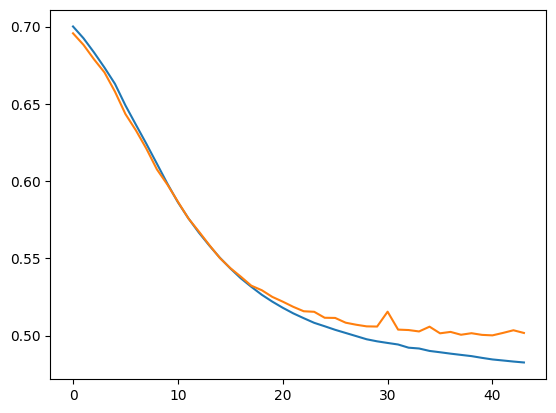

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [37]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [38]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001) #기본 0.001
model2.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy', # 2진분류
    metrics=['accuracy']
)

cp_cb = keras.callbacks.ModelCheckpoint(
    'best_rnn_emb.keras',
    save_best_only=True
)

es_cb = keras.callbacks.EarlyStopping(
    patience=3, 
    restore_best_weights=True
) # 손실값이 3번 증가하면 중단, 좋은 가중치 저장

history = model2.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64, #64개씩 꺼내서 학습
    validation_data=(val_seq, val_target),
    callbacks=[cp_cb, es_cb]
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5172 - loss: 0.6942 - val_accuracy: 0.6150 - val_loss: 0.6715
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6310 - loss: 0.6647 - val_accuracy: 0.6580 - val_loss: 0.6522
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6760 - loss: 0.6436 - val_accuracy: 0.6890 - val_loss: 0.6316
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6987 - loss: 0.6248 - val_accuracy: 0.7052 - val_loss: 0.6168
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7095 - loss: 0.6113 - val_accuracy: 0.7130 - val_loss: 0.6035
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7276 - loss: 0.5931 - val_accuracy: 0.7050 - val_loss: 0.6027
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7342 - loss: 0.5802 - val_accuracy: 0.7184 - val_loss: 0.5848
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7337 - loss: 0.5725 - 